# Stock Market Prediction And Forecasting Using Stacked LSTM

## Importing Necessary libraries

In [1]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,8
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from numpy import array

In [2]:
import pandas as pd

### Importing necessary file

In [3]:
df=pd.read_csv(r'E:\Himanshu_Kumar_stuff\data science and ML\Datasets\NALCO5YRDATA.csv')
data1=pd.read_csv(r'E:\Himanshu_Kumar_stuff\data science and ML\Datasets\NALCO5YRDATA.csv')
hd='26-08-2022'




## Exploatory Data Analysis


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-28,69.650002,70.500000,69.349998,69.550003,49.799145,1610821
1,2017-08-29,69.500000,69.750000,67.699997,67.949997,48.653507,1676347
2,2017-08-30,68.250000,69.949997,68.250000,69.449997,49.727528,1802468
3,2017-08-31,69.800003,72.900002,69.500000,72.250000,51.732388,5531093
4,2017-09-01,73.449997,75.199997,72.300003,74.849998,53.594032,5232621


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1232,2022-08-22,79.000000,79.000000,76.800003,77.000000,77.000000,12092950
1233,2022-08-23,76.199997,79.599998,75.949997,79.199997,79.199997,13581136
1234,2022-08-24,79.400002,80.500000,78.949997,79.949997,79.949997,9316991
1235,2022-08-25,80.199997,80.900002,79.300003,79.599998,79.599998,7118905
1236,2022-08-26,80.199997,82.550003,79.849998,81.699997,81.699997,15110236


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

0       69.550003
1       67.949997
2       69.449997
3       72.250000
4       74.849998
          ...    
1232    77.000000
1233    79.199997
1234    79.949997
1235    79.599998
1236    81.699997
Name: Close, Length: 1237, dtype: float64

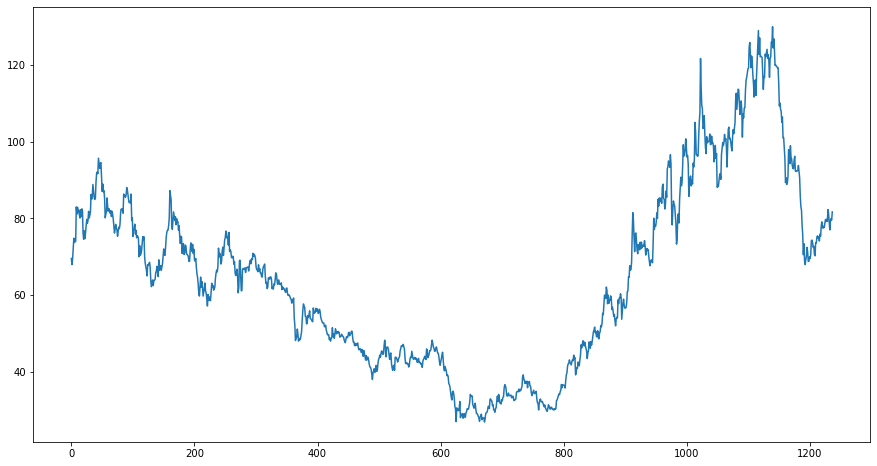

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

## Standardizing the dataset

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
import numpy as np

In [10]:
type(df1)


pandas.core.series.Series

In [11]:

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

## Splitting data into train , test

In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
print(df1)

[[0.41367607]
 [0.3981571 ]
 [0.41270608]
 ...
 [0.51454895]
 [0.5111542 ]
 [0.53152276]]


In [14]:
training_size,test_size

(804, 433)

In [15]:
train_data

array([[0.41367607],
       [0.3981571 ],
       [0.41270608],
       [0.43986421],
       [0.46508242],
       [0.45441319],
       [0.45586811],
       [0.45732302],
       [0.54413191],
       [0.52570318],
       [0.543162  ],
       [0.53152276],
       [0.53588751],
       [0.52376336],
       [0.51600386],
       [0.53685742],
       [0.51939861],
       [0.53928225],
       [0.5354025 ],
       [0.47720658],
       [0.46217268],
       [0.48351115],
       [0.46411251],
       [0.47914649],
       [0.49709022],
       [0.51260912],
       [0.5029098 ],
       [0.50969929],
       [0.53297767],
       [0.51600386],
       [0.52279343],
       [0.53297767],
       [0.5756547 ],
       [0.56353055],
       [0.57419979],
       [0.60087292],
       [0.58389911],
       [0.56789522],
       [0.56304556],
       [0.56595538],
       [0.6066925 ],
       [0.62851597],
       [0.63239571],
       [0.62803106],
       [0.66731326],
       [0.65421919],
       [0.64161012],
       [0.653

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape)
print(y_train.shape)

(703, 100)
(703,)


In [19]:
print(X_test.shape), print(ytest.shape)

(332, 100)
(332,)


(None, None)

## Reshaping the data points

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
y_train.shape

(703,)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #input_shape=(len(X_train),1)
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1) #100

Epoch 1/100
11/11 [==============================] - 16s 502ms/step - loss: 0.0240 - val_loss: 0.0442
Epoch 2/100
11/11 [==============================] - 2s 218ms/step - loss: 0.0050 - val_loss: 0.0112
Epoch 3/100
11/11 [==============================] - 2s 223ms/step - loss: 0.0027 - val_loss: 0.0154
Epoch 4/100
11/11 [==============================] - 2s 219ms/step - loss: 0.0016 - val_loss: 0.0087
Epoch 5/100
11/11 [==============================] - 2s 214ms/step - loss: 0.0015 - val_loss: 0.0087
Epoch 6/100
11/11 [==============================] - 2s 206ms/step - loss: 0.0013 - val_loss: 0.0086
Epoch 7/100
11/11 [==============================] - 2s 213ms/step - loss: 0.0013 - val_loss: 0.0079
Epoch 8/100
11/11 [==============================] - 2s 214ms/step - loss: 0.0012 - val_loss: 0.0080
Epoch 9/100
11/11 [==============================] - 2s 211ms/step - loss: 0.0012 - val_loss: 0.0081
Epoch 10/100
11/11 [==============================] - 2s 218ms/step - loss: 0.0012 - val_l

Epoch 79/100
11/11 [==============================] - 2s 209ms/step - loss: 3.5807e-04 - val_loss: 0.0021
Epoch 80/100
11/11 [==============================] - 2s 209ms/step - loss: 3.5578e-04 - val_loss: 0.0021
Epoch 81/100
11/11 [==============================] - 2s 213ms/step - loss: 3.9884e-04 - val_loss: 0.0016
Epoch 82/100
11/11 [==============================] - 2s 206ms/step - loss: 3.5454e-04 - val_loss: 0.0024
Epoch 83/100
11/11 [==============================] - 2s 204ms/step - loss: 3.5254e-04 - val_loss: 0.0017
Epoch 84/100
11/11 [==============================] - 2s 205ms/step - loss: 3.7256e-04 - val_loss: 0.0016
Epoch 85/100
11/11 [==============================] - 311s 31s/step - loss: 3.9974e-04 - val_loss: 0.0036
Epoch 86/100
11/11 [==============================] - 2s 147ms/step - loss: 3.6333e-04 - val_loss: 0.0016
Epoch 87/100
11/11 [==============================] - 2s 151ms/step - loss: 4.9080e-04 - val_loss: 0.0019
Epoch 88/100
11/11 [==========================

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.10.0'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 39ms/step


In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics

math.sqrt(mean_squared_error(y_train,train_predict)) #with 150 epochs ,rmse is 0.015370489794702855

52.92409774910709

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict)) #with 100 epochs , mse is 91.13963626160528 ,with 150 epochs its 0.050239703404997754 

92.15759787232427

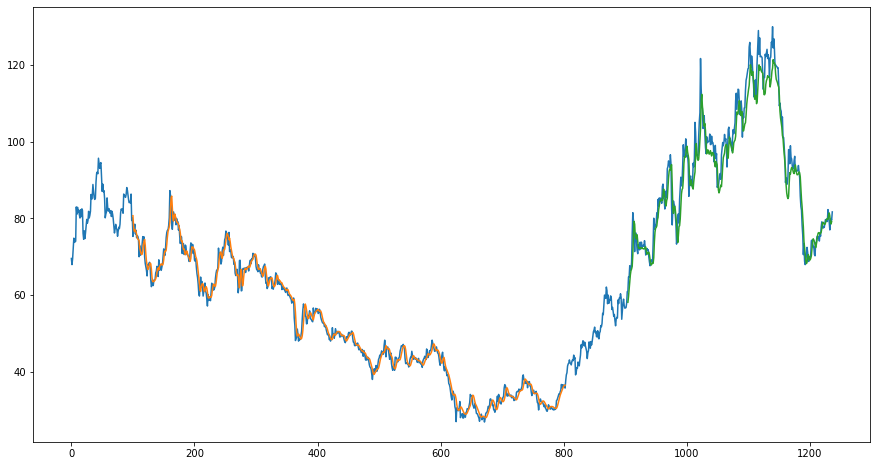

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

433

In [37]:
x_input=test_data[333:].reshape(1,-1)
x_input.shape


(1, 100)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.960717720659554,
 0.9573229679922407,
 1.0,
 0.9461687390882639,
 0.9694471193016491,
 0.9442289039767217,
 0.9020368768186228,
 0.9034917846750729,
 0.9000969641125122,
 0.8991270417070806,
 0.8957322987390884,
 0.8962172938894278,
 0.855965101842871,
 0.7997090009699322,
 0.8069834917555773,
 0.7909796023278372,
 0.7861299418040738,
 0.7580019689621728,
 0.7715809602327838,
 0.7187196896217265,
 0.7196896023278371,
 0.6954412997090205,
 0.6677982541222115,
 0.6057225800193987,
 0.6178467313288071,
 0.6008729194956354,
 0.6047526673132881,
 0.6207565664403493,
 0.689136731328807,
 0.6867119010669254,
 0.6532492725509215,
 0.6988360523763337,
 0.6692531716779826,
 0.6653734238603298,
 0.6483996120271581,
 0.6416101163918526,
 0.6406401260911736,
 0.6619786808923376,
 0.6721629194956353,
 0.6348205431619787,
 0.6357904655674103,
 0.6338506304558681,
 0.6353055480116393,
 0.6367604558680893,
 0.6488846071774976,
 0.6343356256062077,
 0.6178467313288071,
 0.5712900387972842,
 0.5451018

In [40]:
# demonstrate prediction for next 10 days


lst_output=[]
n_steps=100
i=0
while(i<30): #change for predicting feature 
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5184132]
101
1 day input [0.95732297 1.         0.94616874 0.96944712 0.9442289  0.90203688
 0.90349178 0.90009696 0.89912704 0.8957323  0.89621729 0.8559651
 0.799709   0.80698349 0.7909796  0.78612994 0.75800197 0.77158096
 0.71871969 0.7196896  0.6954413  0.66779825 0.60572258 0.61784673
 0.60087292 0.60475267 0.62075657 0.68913673 0.6867119  0.65324927
 0.69883605 0.66925317 0.66537342 0.64839961 0.64161012 0.64064013
 0.66197868 0.67216292 0.63482054 0.63579047 0.63385063 0.63530555
 0.63676046 0.64888461 0.63433563 0.61784673 0.57129004 0.54510182
 0.5354025  0.49757514 0.47332684 0.42337539 0.45101845 0.4068865
 0.3981571  0.41125124 0.41998057 0.44180404 0.42967989 0.40640158
 0.40640158 0.41755574 0.41367607 0.4228904  0.45877786 0.46023276
 0.45344328 0.44180404 0.44422887 0.42386031 0.42046557 0.45295827
 0.45295827 0.46750726 0.47090201 0.46508242 0.46847718 0.45780793
 0.47526675 0.46993209 0.49369547 0.50630454 0.49175556 0.49030065
 0.49515031 0.49224056 0.50339479 0.

8 day output [[0.5060864]]
9 day input [0.89912704 0.8957323  0.89621729 0.8559651  0.799709   0.80698349
 0.7909796  0.78612994 0.75800197 0.77158096 0.71871969 0.7196896
 0.6954413  0.66779825 0.60572258 0.61784673 0.60087292 0.60475267
 0.62075657 0.68913673 0.6867119  0.65324927 0.69883605 0.66925317
 0.66537342 0.64839961 0.64161012 0.64064013 0.66197868 0.67216292
 0.63482054 0.63579047 0.63385063 0.63530555 0.63676046 0.64888461
 0.63433563 0.61784673 0.57129004 0.54510182 0.5354025  0.49757514
 0.47332684 0.42337539 0.45101845 0.4068865  0.3981571  0.41125124
 0.41998057 0.44180404 0.42967989 0.40640158 0.40640158 0.41755574
 0.41367607 0.4228904  0.45877786 0.46023276 0.45344328 0.44180404
 0.44422887 0.42386031 0.42046557 0.45295827 0.45295827 0.46750726
 0.47090201 0.46508242 0.46847718 0.45780793 0.47526675 0.46993209
 0.49369547 0.50630454 0.49175556 0.49030065 0.49515031 0.49224056
 0.50339479 0.51212412 0.50727446 0.51309411 0.50727446 0.53734242
 0.5271581  0.50678954 0

 0.49393412 0.49129272 0.48862839 0.48596048]
17 day output [[0.4833057]]
18 day input [0.77158096 0.71871969 0.7196896  0.6954413  0.66779825 0.60572258
 0.61784673 0.60087292 0.60475267 0.62075657 0.68913673 0.6867119
 0.65324927 0.69883605 0.66925317 0.66537342 0.64839961 0.64161012
 0.64064013 0.66197868 0.67216292 0.63482054 0.63579047 0.63385063
 0.63530555 0.63676046 0.64888461 0.63433563 0.61784673 0.57129004
 0.54510182 0.5354025  0.49757514 0.47332684 0.42337539 0.45101845
 0.4068865  0.3981571  0.41125124 0.41998057 0.44180404 0.42967989
 0.40640158 0.40640158 0.41755574 0.41367607 0.4228904  0.45877786
 0.46023276 0.45344328 0.44180404 0.44422887 0.42386031 0.42046557
 0.45295827 0.45295827 0.46750726 0.47090201 0.46508242 0.46847718
 0.45780793 0.47526675 0.46993209 0.49369547 0.50630454 0.49175556
 0.49030065 0.49515031 0.49224056 0.50339479 0.51212412 0.50727446
 0.51309411 0.50727446 0.53734242 0.5271581  0.50678954 0.48593598
 0.50727446 0.51454895 0.5111542  0.5315227

26 day output [[0.46239772]]
27 day input [0.62075657 0.68913673 0.6867119  0.65324927 0.69883605 0.66925317
 0.66537342 0.64839961 0.64161012 0.64064013 0.66197868 0.67216292
 0.63482054 0.63579047 0.63385063 0.63530555 0.63676046 0.64888461
 0.63433563 0.61784673 0.57129004 0.54510182 0.5354025  0.49757514
 0.47332684 0.42337539 0.45101845 0.4068865  0.3981571  0.41125124
 0.41998057 0.44180404 0.42967989 0.40640158 0.40640158 0.41755574
 0.41367607 0.4228904  0.45877786 0.46023276 0.45344328 0.44180404
 0.44422887 0.42386031 0.42046557 0.45295827 0.45295827 0.46750726
 0.47090201 0.46508242 0.46847718 0.45780793 0.47526675 0.46993209
 0.49369547 0.50630454 0.49175556 0.49030065 0.49515031 0.49224056
 0.50339479 0.51212412 0.50727446 0.51309411 0.50727446 0.53734242
 0.5271581  0.50678954 0.48593598 0.50727446 0.51454895 0.5111542
 0.53152276 0.51841319 0.51932722 0.51726282 0.51514924 0.51345915
 0.51184499 0.51009166 0.50816667 0.50608641 0.50386697 0.50152254
 0.49907106 0.4965339

In [41]:
day_new=np.arange(1,101) # 100 because we are looking 100 days back to predict the next day
day_pred=np.arange(101,131) # 131 because we are predicting for 30 days 

In [42]:
import matplotlib.pyplot as plt

In [43]:
len(df1)

1237

In [44]:
len(lst_output)

30

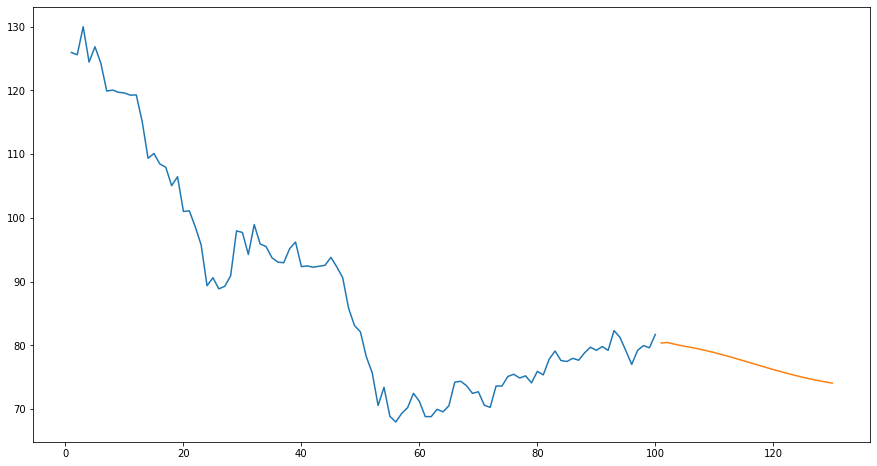

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:])) #1137= len(df1)-100
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [46]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
import plotly.express as px
#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

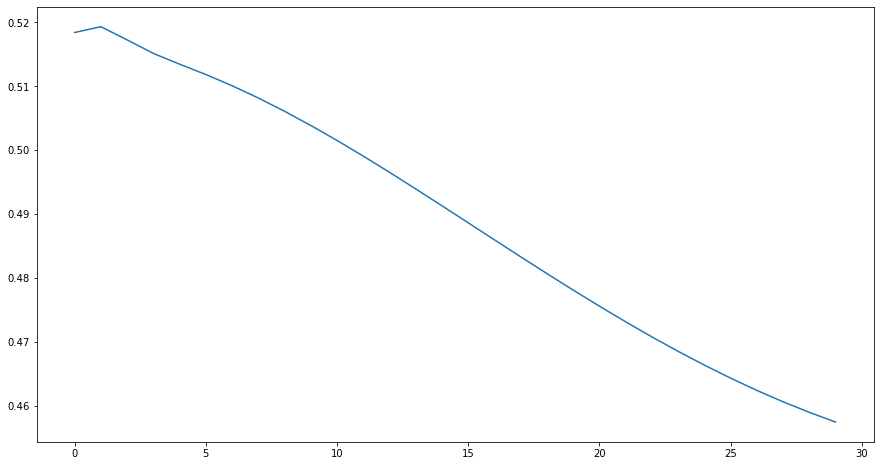

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1237:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

In [49]:
len(df3)

1267

In [50]:
df11=df3.copy()
fig = px.line(df11)
fig.show()

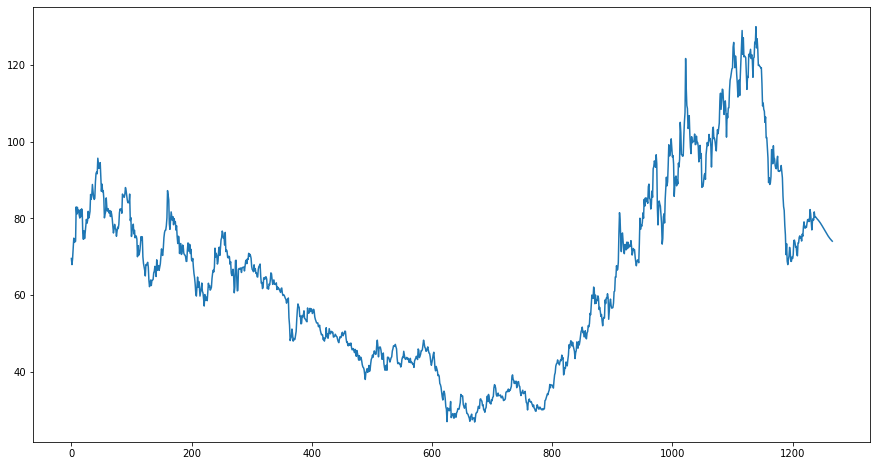

In [51]:
plt.plot(df3)

In [65]:
print("the limit and correct prediction of model is 30 days ")
print("The maximum date entered is 26-08-2022")
date_str=input("Date you want to predict ")
date_predict = datetime.strptime(date_str, '%d-%m-%Y').date()
hd1=datetime.strptime(hd, '%d-%m-%Y').date()
dayss=date_predict-hd1
print("Change value of x which is set to 0 to ",dayss)
x=0
x=4
print("Price of Stock is ",df3[1237+20][0])

the limit and correct prediction of model is 30 days 
The maximum date entered is 26-08-2022
Date you want to predict 30-08-2022
Change value of x which is set to 0 to  4 days, 0:00:00
Price of Stock is  75.93241239190101


## Pickling the model

In [ ]:
import pickle

In [ ]:
pickle.dump(Sequential,open('lstm_stock_1.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('lstm_stock_1.pkl','rb'))

In [ ]:
df['Close'][0].shape()

In [ ]:

scaler.transform(df['Close'][0].reshape(1,100,1))
#pickled_model.predict(scaler.transform(df['Close'][0].reshape(1,-1,1)))